In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

**The dataset is downloaded from the website. The link is as given below :** <Br>
https://data.cityofnewyork.us/Health/Recognized-Shop-Healthy-Stores/ud4g-9x9z

In [3]:
STORE_NYC=pd.read_csv("store.csv")

In [4]:
STORE_NYC.head()

,Store Name,Street Address,Address,Borough,Zip \nCode,Year Awarded,Program \nWave,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Rivas Deli Grocery,651,East 183rd Street,Bronx,10458,2013,1,40.852568,-73.887484,6.0,15.0,391.0,2012464.0,2.030870e+09,Belmont
1,C-Town,1761,Southern Boulevard,Bronx,10460,2013,1,40.837267,-73.888016,3.0,17.0,155.0,2009878.0,2.029400e+09,Crotona Park East
2,La India Mini Market,1942,Marmion Avenue,Bronx,10460,2013,1,40.842942,-73.887136,6.0,17.0,36502.0,2010156.0,2.029600e+09,East Tremont
3,Los Hermanos,2019,Vyse Avenue,Bronx,10460,2013,1,40.842391,-73.881835,6.0,17.0,363.0,2013203.0,2.031270e+09,East Tremont
4,Price Choice Food Market,820,East 180th Street,Bronx,10460,2013,1,40.846173,-73.884871,6.0,15.0,36501.0,2012955.0,2.031080e+09,East Tremont


In [5]:
STORE_NYC['Borough'].value_counts().to_frame()

,Borough
Bronx,166
Brooklyn,112
New York,90


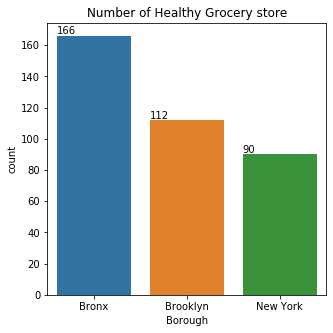

In [6]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=STORE_NYC)
ax.set_title("Number of Healthy Grocery store")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();